In [36]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [37]:
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [0]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import random

In [0]:
np.random.seed(0)
import pickle

In [40]:
with open('german-traffic-signs/train.p', 'rb') as f:
  train_data = pickle.load(f)
with open('german-traffic-signs/test.p', 'rb') as f:
  test_data = pickle.load(f)
with open('german-traffic-signs/valid.p', 'rb') as f:
  val_data = pickle.load(f)
  
print(type(train_data))

X_train, y_train = train_data['features'], train_data['labels']
X_val, y_val = val_data['features'], val_data['labels']
X_test, y_test = test_data['features'], test_data['labels']

<class 'dict'>


In [41]:
print(X_train.shape,'\n',X_val.shape,'\n',X_test.shape)
import pandas as pd

(34799, 32, 32, 3) 
 (4410, 32, 32, 3) 
 (12630, 32, 32, 3)


In [42]:
data = pd.read_csv('german-traffic-signs/signnames.csv')
print(data)

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vechiles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

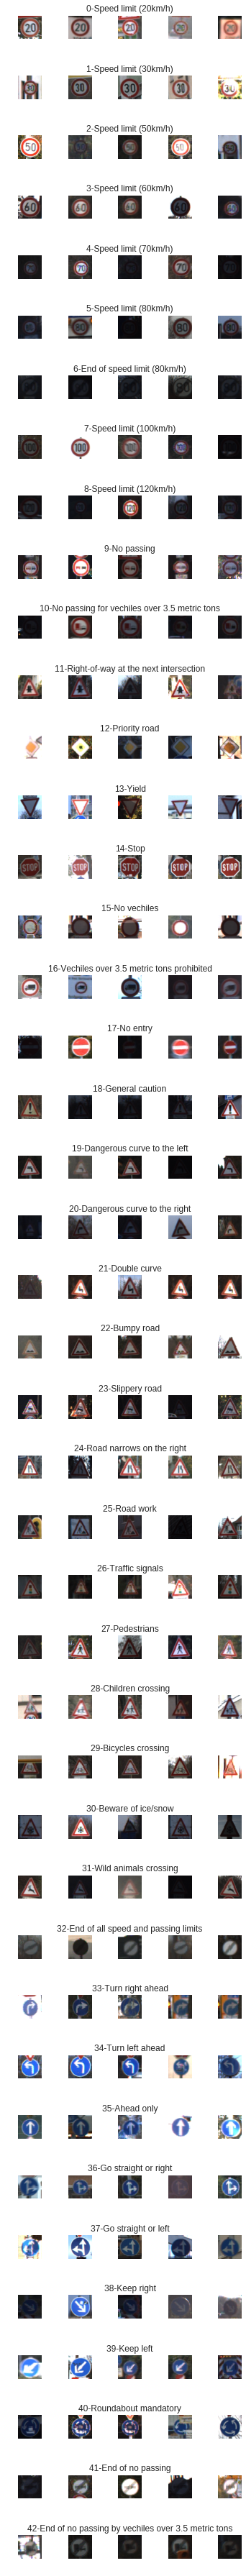

In [44]:
num_of_samples = []

cols = 5
num_classes = 43

fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 50))
fig.tight_layout()
for i in range(cols):
    for j, row in data.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j) + '-' + row['SignName'])
            num_of_samples.append(len(x_selected))


[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


Text(0,0.5,'Number of images')

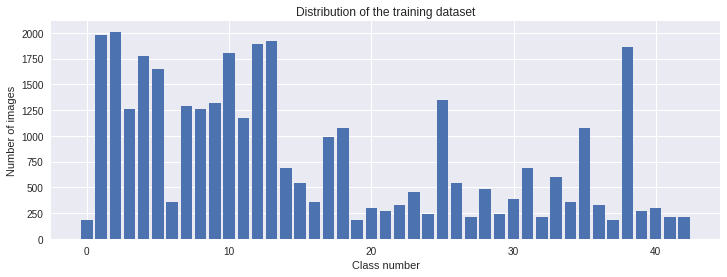

In [45]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

36 th Label
(32, 32, 3)


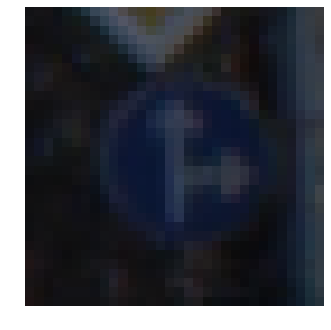

In [46]:
import cv2

plt.imshow(X_train[1000])
plt.axis('off')
print(y_train[1000],'th Label')
print(X_train[1000].shape)

(32, 32)


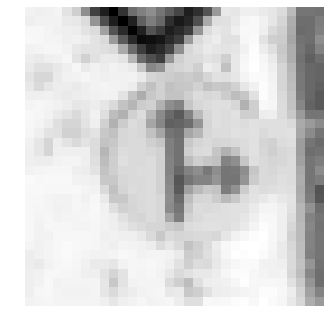

In [47]:
def grayscale(img):
  return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img = grayscale(X_train[1000])
plt.imshow(img)
plt.axis('off')
print(img.shape)

## Now histogram equalization

(32, 32)


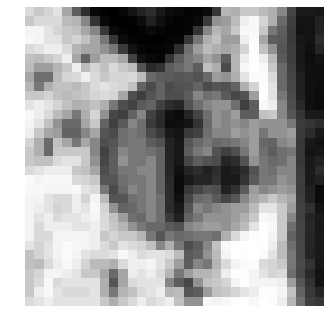

In [48]:
def equalize(img):
  return cv2.equalizeHist(img)#this function works only with grascale images

img = equalize(img)
plt.imshow(img)
plt.axis('off')
print(img.shape)

In [0]:
def preprocessing(img):
  img = grayscale(img)
  img = equalize(img)
  img = img/255
  return img

X_train = np.array(list(map(preprocessing, X_train)))
X_val = np.array(list(map(preprocessing, X_val)))
X_test = np.array(list(map(preprocessing, X_test)))


(34799, 32, 32)


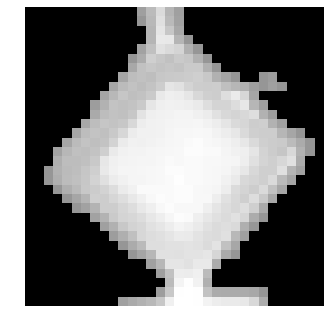

In [50]:
plt.imshow(X_train[random.randint(0, len(X_train - 1))])
plt.axis('off')
print(X_train.shape)

In [51]:
X_train = X_train.reshape(34799, 32, 32, 1)
X_val = X_val.reshape(4410, 32, 32, 1)
X_test = X_test.reshape(12630, 32, 32, 1)

print(X_train.shape,'\n',X_val.shape,'\n',X_test.shape)

(34799, 32, 32, 1) 
 (4410, 32, 32, 1) 
 (12630, 32, 32, 1)


In [0]:
#one hot encoding
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)
y_test = to_categorical(y_test, 43)

In [0]:
#--------------------------------Preprocessing finished---------------------------------------#

In [0]:
#LeNet INPUT => CONV => RELU => POOL => CONV => RELU => POOL => FC => RELU => FC

In [0]:
def modified_leNet_model():
  model = Sequential()
  model.add(Conv2D(60, (5,5), input_shape=(32, 32, 1), activation='relu'))
  model.add(Conv2D(60, (5,5), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  
  model.add(Conv2D(30, (3,3), activation='relu'))
  model.add(Conv2D(30, (3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.5))
  
  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  
  model.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics = ['accuracy'])
  return model

In [85]:
model = modified_leNet_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 4, 4, 30)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 4, 4, 30)          0         
__________

In [86]:
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_val, y_val), batch_size=400, verbose=1, shuffle=1)

Train on 34799 samples, validate on 4410 samples
Epoch 1/15
34799/34799 [==============================] - 7s 199us/step - loss: 2.5001 - acc: 0.3278 - val_loss: 0.8008 - val_acc: 0.7959
Epoch 2/15
34799/34799 [==============================] - 6s 163us/step - loss: 0.7847 - acc: 0.7616 - val_loss: 0.3231 - val_acc: 0.9095
Epoch 3/15
34799/34799 [==============================] - 6s 162us/step - loss: 0.4371 - acc: 0.8658 - val_loss: 0.2125 - val_acc: 0.9406
Epoch 4/15
34799/34799 [==============================] - 6s 162us/step - loss: 0.3223 - acc: 0.9006 - val_loss: 0.1705 - val_acc: 0.9483
Epoch 5/15
34799/34799 [==============================] - 6s 164us/step - loss: 0.2537 - acc: 0.9206 - val_loss: 0.1233 - val_acc: 0.9701
Epoch 6/15
34799/34799 [==============================] - 6s 162us/step - loss: 0.2042 - acc: 0.9361 - val_loss: 0.1062 - val_acc: 0.9692
Epoch 7/15
34799/34799 [==============================] - 6s 164us/step - loss: 0.1808 - acc: 0.9434 - val_loss: 0.0881 - v

Text(0.5,0,'Epochs')

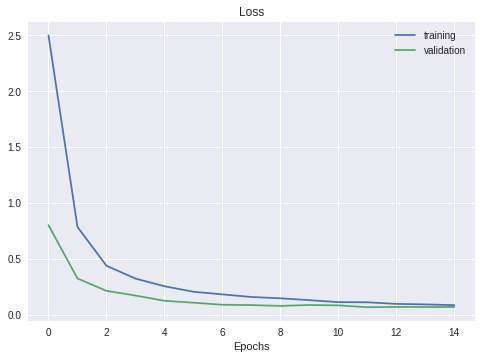

In [87]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epochs')

Text(0.5,0,'Epochs')

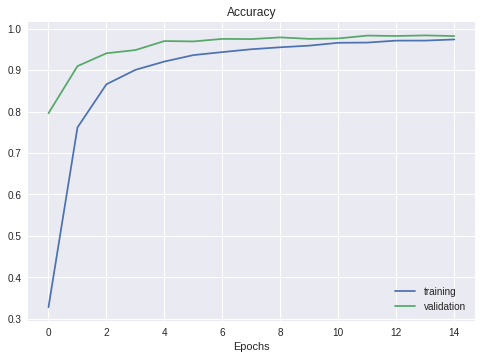

In [88]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'])
plt.title('Accuracy')
plt.xlabel('Epochs')

In [89]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test_Score:', score[0])
print('Test_Accuracy:', score[1])

Test_Score: 0.14112032469176197
Test_Accuracy: 0.9580364212381962


In [0]:
#---------------------------------------Training Complete--------------------------------------------#

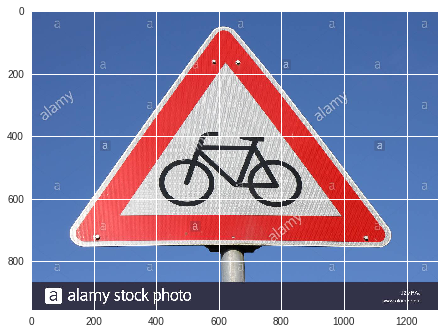

In [91]:
import requests
from PIL import Image
url = 'https://c8.alamy.com/comp/J2MRAJ/german-road-sign-bicycles-crossing-J2MRAJ.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))


(32, 32)


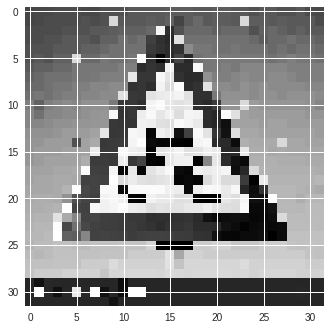

In [92]:
#Preprocess image

img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)

In [109]:
#Reshape reshape

img = img.reshape(1, 32, 32, 1)

#Test image
pred_label = int(model.predict_classes(img))
print("Predicted Sign: "+ data.at[pred_label,'SignName'])

Predicted Sign: Bicycles crossing


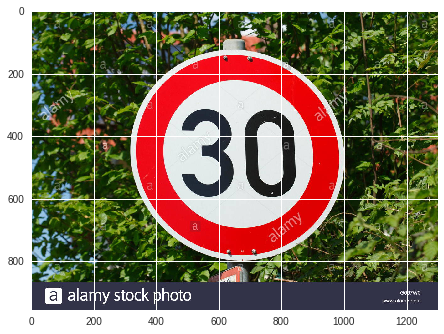

In [110]:
#Another Image
url = 'https://c8.alamy.com/comp/G667W0/road-sign-speed-limit-30-kmh-zone-passau-bavaria-germany-G667W0.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

(32, 32)


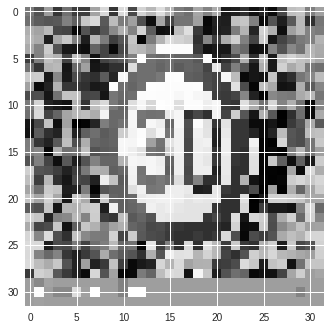

In [111]:
#Preprocess image

img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)

In [112]:
#Reshape reshape

img = img.reshape(1, 32, 32, 1)

#Test image
pred_label = int(model.predict_classes(img))
print("Predicted Sign: "+ data.at[pred_label,'SignName'])

Predicted Sign: Speed limit (30km/h)


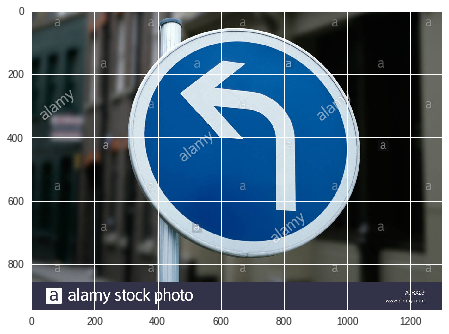

In [114]:
#Now other image
url = 'https://c8.alamy.com/comp/A0RX23/cars-and-automobiles-must-turn-left-ahead-sign-A0RX23.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))


(32, 32)
Predicted Sign: Priority road


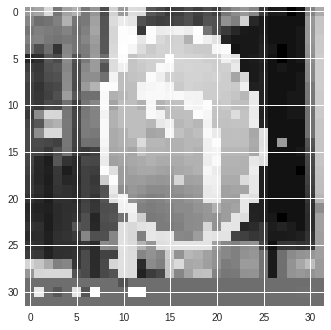

In [115]:
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)

#Reshape reshape

img = img.reshape(1, 32, 32, 1)

#Test image
pred_label = int(model.predict_classes(img))
print("Predicted Sign: "+ data.at[pred_label,'SignName'])

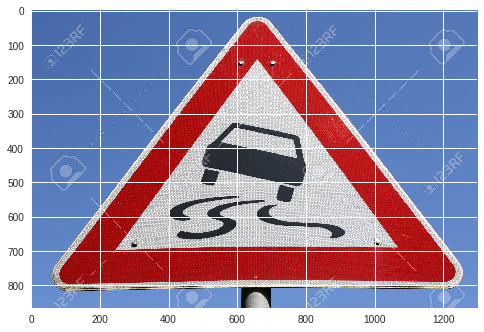

In [116]:
# One more image
url = 'https://previews.123rf.com/images/bwylezich/bwylezich1608/bwylezich160800375/64914157-german-road-sign-slippery-road.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

(32, 32)
Predicted Sign: Slippery road


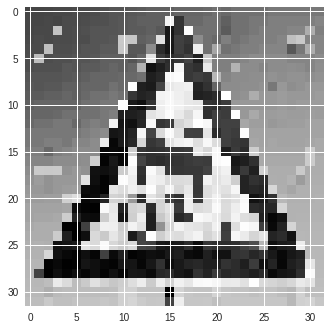

In [117]:
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)

#Reshape reshape

img = img.reshape(1, 32, 32, 1)

#Test image
pred_label = int(model.predict_classes(img))
print("Predicted Sign: "+ data.at[pred_label,'SignName'])

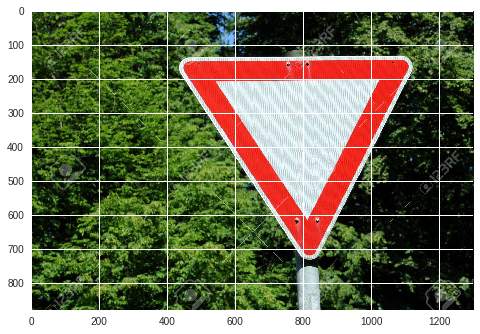

In [118]:

# Last Image
url = 'https://previews.123rf.com/images/pejo/pejo0907/pejo090700003/5155701-german-traffic-sign-no-205-give-way.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

(32, 32)
Predicted Sign: Speed limit (50km/h)


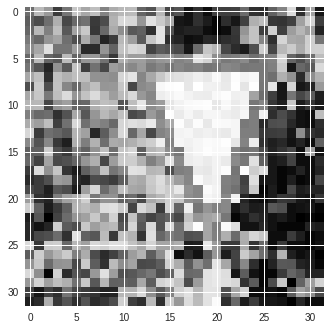

In [119]:
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)

#Reshape reshape

img = img.reshape(1, 32, 32, 1)

#Test image
pred_label = int(model.predict_classes(img))
print("Predicted Sign: "+ data.at[pred_label,'SignName']) #this is wrong prediction

In [157]:
model.save('model.h5')
!ls

german-traffic-signs  model  model.h5  model.txt  sample_data
